In [9]:
base_dir = '/path/Dataset'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['validation', 'train']

Contents of train directory:
['Plastik', 'Logam', 'Botol Plastik']

Contents of validation directory:
['Plastik', 'Logam', 'Botol Plastik']


In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Menentukan posisi Train dan Validation Dir
train_dir = f'{base_dir}/train'
validation_dir = f'{base_dir}/validation'

# Menentukan dimensi gambar dan jumlah kelas
image_width = 150
image_height = 150
num_classes = 3

# Pra-pemrosesan dan augmentasi gambar menggunakan ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,  # Skala ulang intensitas pixel menjadi rentang 0-1
                                   rotation_range=20,  # Rotasi acak gambar dalam rentang 0-20 derajat
                                   horizontal_flip=True,  # Flip horizontal acak pada gambar
                                   )  

validation_datagen = ImageDataGenerator(rescale=1./255)  # Skala ulang intensitas pixel gambar validasi

# Menggunakan ImageDataGenerator untuk memuat dan mempersiapkan data latihan
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_width, image_height),
    batch_size=126,
    class_mode='categorical')

# Menggunakan ImageDataGenerator untuk memuat dan mempersiapkan data validasi
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(image_width, image_height),
    batch_size=126,
    class_mode='categorical')


Found 1929 images belonging to 3 classes.
Found 781 images belonging to 3 classes.


In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [18]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size)


Epoch 1/10
15/15 [==============================] - 458s 32s/step - loss: 1.1461 - accuracy: 0.4049 - val_loss: 5.1625 - val_accuracy: 0.3201
Epoch 2/10
15/15 [==============================] - 20s 1s/step - loss: 1.2388 - accuracy: 0.5358 - val_loss: 0.7832 - val_accuracy: 0.5675
Epoch 3/10
15/15 [==============================] - 21s 1s/step - loss: 0.8225 - accuracy: 0.6478 - val_loss: 0.8443 - val_accuracy: 0.5661
Epoch 4/10
15/15 [==============================] - 19s 1s/step - loss: 0.7454 - accuracy: 0.6728 - val_loss: 0.9121 - val_accuracy: 0.5675
Epoch 5/10
15/15 [==============================] - 18s 1s/step - loss: 0.7232 - accuracy: 0.6916 - val_loss: 0.6973 - val_accuracy: 0.7354
Epoch 6/10
15/15 [==============================] - 20s 1s/step - loss: 0.7336 - accuracy: 0.7088 - val_loss: 0.6170 - val_accuracy: 0.7672
Epoch 7/10
15/15 [==============================] - 20s 1s/step - loss: 0.6123 - accuracy: 0.7532 - val_loss: 0.5081 - val_accuracy: 0.8056
Epoch 8/10
15/15 [

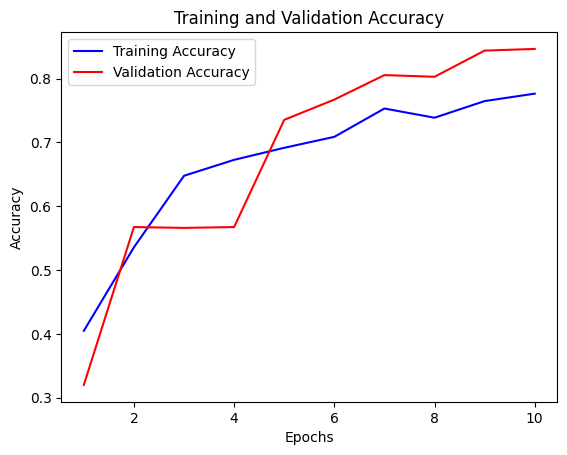

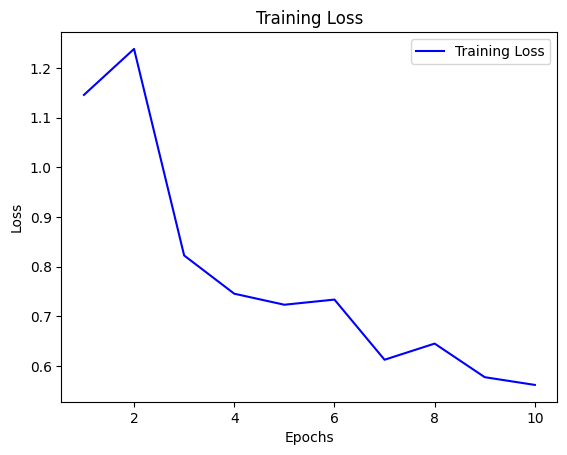

In [19]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [20]:
export_path = '/path/Model'

tf.saved_model.save(model, export_path)

print("Model berhasil diekspor ke format TensorFlow SavedModel!")

Model berhasil diekspor ke format TensorFlow SavedModel!


In [30]:
tflite_path = '/path/saved_model/model.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open(tflite_path, 'wb') as f:
    f.write(tflite_model)


print("Model berhasil diekspor ke format TensorFlow Lite!")


Model berhasil diekspor ke format TensorFlow Lite!
